In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
# Read the 2015-2016 wave of NHANES data
da = pd.read_csv("data/nhanes_2015_2016.csv")

# Drop unused columns, and drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

In [4]:
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR', data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          2.09e-259
Time:                        11:54:33   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
da.BPXSY1.std()

18.486559500782416

In [6]:
cc = da[["BPXSY1", "RIDAGEYR"]].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.20715459625188243


In [7]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0, 1]**2)

0.20715459625186952


#### Thus, we see that in a linear model fit with only one covariate, the regression R-squared is equal to the squared Pearson correlation between the covariate and the outcome, and is also equal to the squared Pearson correlation between the fitted values and the outcome.

### Adding a second variable

In [8]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [9]:
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + RIAGENDRx', data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          1.87e-268
Time:                        12:03:55   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model that was fit above uses both age and gender to explain the variation in SBP. It finds that two people with the same gender whose ages differ by one year tend to have blood pressure values differing by 0.47 units, which is essentially the same age parameter that we found above in the model based on age alone. This model also shows us that comparing a man and a woman of the same age, the man will on average have 3.23 units greater SBP.

#### It is very important to emphasize that the age coefficient of 0.47 is only meaningful when comparing two people of the same gender, and the gender coefficient of 3.23 is only meaningful when comparing two people of the same age. Moreover, these effects are additive, meaning that if we compare, say, a 50 year old man to a 40 year old woman, the man's blood pressure will on average be around 3.23 + 10*0.47 = 7.93 units higher, with the first term in this sum being attributable to gender, and the second term being attributable to age.

#### We noted above that the regression coefficient for age did not change by much when we added gender to the model. It is important to note however that in general, the estimated coefficient of a variable in a regression model will change when other variables are added or removed. The only circumstance in which a regresion parameters is unchanged when other variables are added or removed from the model is when those variables are uncorrelated with the variables that remain in the model.

#### Below we confirm that gender and age are nearly uncorrelated in this data set (the correlation of around -0.02 is negligible). Thus, it is expected that when we add gender to the model, the age coefficient is unaffected.

In [10]:
# We need to use the original, numerical version of the gender
# variable to calculate the correlation coefficient.
da[["RIDAGEYR", "RIAGENDR"]].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


#### Observe that in the regression output shown above, an R-squared value of 0.215 is listed. Earlier we saw that for a model with only one covariate, the R-squared from the regression could be defined in two different ways, either as the squared correlation coefficient between the covariate and the outcome, or as the squared correlation coefficient between the fitted values and the outcome. When more than one covariate is in the model, only the second of these two definitions continues to hold:

In [12]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
cc[0, 1]**2

0.2147858108624381

### Categorical variables and reference levels

#### In the model fit above, gender is a categorical variable, and only a coefficient for males is included in the regression output (i.e. there is no coefficient for females in the tables above). Whenever a categorical variable is used as a covariate in a regression model, one level of the variable is omitted and is automatically given a coefficient of zero. This level is called the reference level of the covariate. Here, the female level of the gender variable is the reference level. This does not mean that being a woman has no impact on blood pressure. It simply means that we have written the model so that female blood pressure is the default, and the coefficient for males (3.23) shifts the blood pressure by that amount for males only.

#### We could alternatively have set 'male' to be the reference level, in which case males would be the default, and the female coefficient would have been around -3.23 (meaning that female blood pressure is 3.23 units lower than the male blood pressure).

#### When using a categorical variable as a predictor in a regression model, it is recoded into "dummy variables" (also known as "indicator variables"). A dummy variable for a single level, say a, of a variable x, is a variable that is equal to 1 when x=a and is equal to 0 when x is not equal to a. These dummy variables are all included in the regression model, to represent the variable that they are derived from.

#### Statsmodels, like most software, will automatically recode a categorical variable into dummy variables, and will select a reference level (it is possible to override this choice, but we do not cover that here). When interpreting the regression output, the level that is omitted should be seen as having a coefficient of 0, with a standard error of 0. It is important to note that the selection of a reference level is arbitrary and does not imply an assumption or constraint about the model, or about the population that it is intended to capture.

### A model with three variables

In [13]:
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx', data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          8.54e-286
Time:                        15:25:28   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
da[["RIDAGEYR", "RIAGENDR", "BMXBMI"]].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.021398,0.023089
RIAGENDR,-0.021398,1.000000,0.080463
BMXBMI,0.023089,0.080463,1.000000


### Visualization of the fitted models

#### In this section we demonstrate some graphing techniques that can be used to gain a better understanding of a regression model that has been fit to data.

#### We start with plots that allow us to visualize the fitted regression function, that is, the mean systolic blood pressure expressed as a function of the covariates. These plots help to show the estimated role of one variable when the other variables are held fixed. We will also plot 95% simultaneous confidence bands around these fitted lines. Although the estimated mean curve is never exact based on a finite sample of data, we can be 95% confident that the true mean curve falls somewhere within the shaded regions of the plots below.

#### This type of plot requires us to fix the values of all variables other than the independent variable (SBP here), and one independent variable that we call the focus variable (which is age here). Below we fix the gender as "female" and the BMI as 25. Thus, the graphs below show the relationship between expected SBP and age for women with BMI equal to 25.

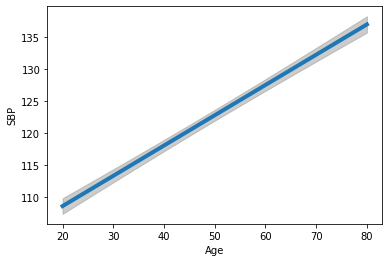

In [15]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}


# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, 'RIDAGEYR',
                               values=values, ci_method='simultaneous')

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel('Age')
_ = ax.set_ylabel('SBP')

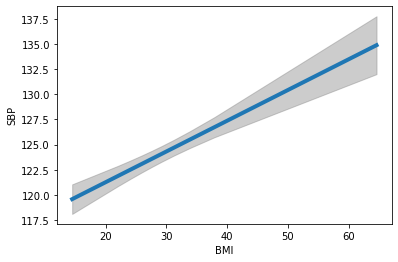

In [16]:
del values["BMXBMI"] # Delete this as it is now the focus variable
values["RIDAGEYR"] = 50
pr, cb, fv = predict_functional(result, "BMXBMI",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("BMI")
_ = ax.set_ylabel("SBP")

#### The error band for BMI is notably wider than the error band for age, indicating that there is less certainty about the relationship between BMI and SBP compared to the relationship between age and SBP.

#### The discussion so far has primarily focused on the mean structure of the population, that is, the model for the average SBP of a person with a given age, gender, and BMI. A regression model can also be used to assess the variance structure of the population, that is, how much and in what manner the observations deviate from their mean. We will focus on informal, graphical methods for assessing this.

#### To begin with, we plot the residuals against the fitted values. Recall that the fitted values are the estimated means for each observation, and the residuals are the difference between an observation and its fitted mean. For example, the model may estimate that a 50 year old female will have on average an SBP of 125. But a specific 50 year old female may have a blood pressure of 110 or 150, for example. The fitted values for both of these women are 125, and their residuals are -15, and 25, respectively.

#### The simplest variance pattern that we can see in a linear regression occurs when the points are scattered around the mean, with the same degree of scatter throughout the range of the covariates. When there are multiple covariates, it is hard to assess whether the variance is uniform throughout this range, but we can easily check for a "mean/variance relationship", in which there is a systematic relationship between the variance and the mean, i.e. the variance either increases or decreases systematically with the mean. The plot of residuals on fitted values is used to assess whether such a mean/variance relationship is present.

#### Below we show the plot of residuals on fitted values for the NHANES data. It appears that we have a modestly increasing mean/variance relationship. That is, the scatter around the mean blood pressure is greater when the mean blood pressure itself is greater.

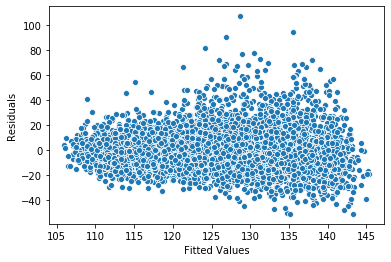

In [20]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted Values")
_ = pp.set_ylabel('Residuals')

#### A "component plus residual plot" or "partial residual plot" is intended to show how the data would look if all but one covariate could be fixed at reference values. By controlling the values of these covariates, all remaining variation is due either to the "focus variable" (the one variable that is left unfixed, and is plotted on the horizontal axis), or to sources of variation that are unexplained by any of the covariates.

#### For example, the partial residual plot below shows how age (horizontal axis) and SBP (vertical axis) would be related if gender and BMI were fixed. Note that the origin of the vertical axis in these plots is not meaningful (we are not implying that anyone's blood pressure would be negative), but the differences along the vertical axis are meaningful. This plot implies that when BMI and gender are held fixed, the average blood pressures of an 80 and 18 year old differ by around 30 mm/Hg. This plot also shows, as discussed above, that the deviations from the mean are somewhat smaller at the low end of the range compared to the high end of the range. We also see that at the high end of the range, the deviations from the mean are somewhat right-skewed, with exceptionally high SBP values being more common than exceptionally low SBP values.

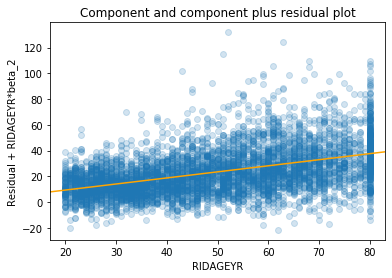

In [21]:
# This is not part of the main Statsmodels API, so needs to be imported separately

from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result, 'RIDAGEYR', ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

#### Next we have a partial residual plot that shows how BMI (horizontal axis) and SBP (vertical axis) would be related if gender and age were fixed. Compared to the plot above, we see here that age is more uniformly distributed than BMI. Also, it appears that there is more scatter in the partial residuals for BMI compared to what we saw above for age. Thus there seems to be less information about SBP in BMI, although a trend certainly exists.

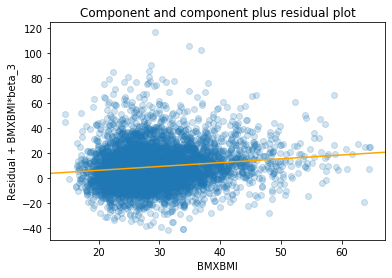

In [22]:
ax = plt.axes()
plot_ccpr(result, 'BMXBMI', ax)
ax.lines[0].set_alpha(0.2)
ax.lines[1].set_color('orange')

#### Another important plot used for understanding a regression model is an "added variable plot". This is a plot that may reveal nonlinearity in the relationship between one covariate and the outcome. Below, we create an added variable plot for age as a predictor of SBP. Note that the two variables being plotted (age and blood pressure) have been centered. The scale of the variables is unchanged, but the origin has been translated to zero. The red line is an estimte of the relationship between age and blood pressure. Unlike the relationship in the model, it is not forced to be linear, and there is in fact a hint that the shape is slightly flatter for the first 15 years or so of age. This would imply that blood pressure increases slightly more slowly for people in theie 20s and early 30s, then begins increasing faster after that point.

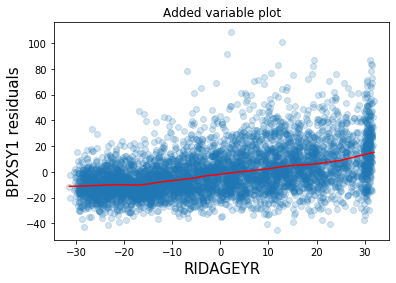

In [27]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula('BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx', data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable('RIDAGEYR')
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)